In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

NUM_CLASSES = 8

CHANNELS = 3

IMAGE_RESIZE = 96

NUM_EPOCHS = 20

STEPS_PER_EPOCH_TRAINING = 200
STEPS_PER_EPOCH_VALIDATION = 200

BATCH_SIZE_TRAINING = 80
BATCH_SIZE_VALIDATION = 30

BATCH_SIZE_TESTING = 1



In [6]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, GlobalAveragePooling2D, LeakyReLU
from keras.models import Sequential
from keras import optimizers




from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = IMAGE_RESIZE

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        'dataset/train',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        'dataset/valid',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical') 



Found 10200 images belonging to 8 classes.
Found 2400 images belonging to 8 classes.


In [7]:
def conv_pool_cnn(dim=224,freeze_layers=10,full_freeze='N'):

  model = ResNet50(include_top=False)
  x = model.output
  x = GlobalAveragePooling2D()(x)
  
  model = Model(input = model.input,outputs=x)
  
  model_final = Sequential()
  model_final.add(model)
  
  model_final.add(Dense(2048))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.1))
  
  model_final.add(Dense(1024))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.1))
  
  model_final.add(Dense(512))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.2))
  
  model_final.add(Dense(256))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.2))
    
  model_final.add(Dense(128))
  model_final.add(LeakyReLU(alpha=0.2))
  model_final.add(Dropout(0.2))

  model_final.add(Dense(8,activation='softmax'))
  
  model_final.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  
  
  if full_freeze != 'N':
    for layer in model.layers[0:freeze_layers]:
      layer.trainable = False
  model_final.summary()
  return model_final


In [8]:
model = conv_pool_cnn()

C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("gl..., inputs=Tensor("in...)`
  import sys


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Model)              (None, 2048)              23587712  
_________________________________________________________________
dense_7 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 2048)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
__________

In [9]:
(BATCH_SIZE_TRAINING, len(train_generator), BATCH_SIZE_VALIDATION, len(validation_generator))


fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION
)

model.save('model_resnet50.hdf5')

print(fit_history.history.keys())

Epoch 1/20
200/200 [==============================] - 3700s 18s/step - loss: 1.8248 - acc: 0.4123 - val_loss: 6.5559 - val_acc: 0.2133
Epoch 2/20
200/200 [==============================] - 3756s 19s/step - loss: 1.6184 - acc: 0.4754 - val_loss: 2.5206 - val_acc: 0.3025
Epoch 3/20
200/200 [==============================] - 4012s 20s/step - loss: 1.8352 - acc: 0.4252 - val_loss: 2.4175 - val_acc: 0.3105
Epoch 4/20
200/200 [==============================] - 3812s 19s/step - loss: 1.6183 - acc: 0.4718 - val_loss: 1.6647 - val_acc: 0.3580
Epoch 5/20
200/200 [==============================] - 3840s 19s/step - loss: 1.5528 - acc: 0.4981 - val_loss: 1.6078 - val_acc: 0.3822
Epoch 6/20
200/200 [==============================] - 3687s 18s/step - loss: 1.5302 - acc: 0.5223 - val_loss: 1.9135 - val_acc: 0.2807
Epoch 7/20
200/200 [==============================] - 3917s 20s/step - loss: 1.7232 - acc: 0.4602 - val_loss: 4.4484 - val_acc: 0.2485
Epoch 8/20
200/200 [==============================] - 3

KeyboardInterrupt: 

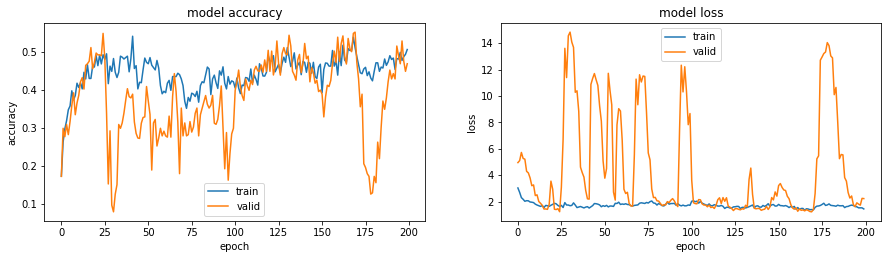

In [6]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['acc'])  
plt.plot(fit_history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.savefig("acc.png")
#plt.show()



In [8]:
test_generator = data_generator.flow_from_directory(
    directory = 'dataset/valid',
    target_size = (image_size, image_size),
    batch_size = BATCH_SIZE_TESTING,
    class_mode = None,
    shuffle = False,
    seed = 123
)

test_generator.reset()

pred = model.predict_generator(test_generator, steps = len(test_generator), verbose = 1)

predicted_class_indices = np.argmax(pred, axis = 1)

print(predicted_class_indices)

Found 877 images belonging to 8 classes.
877/877 [==============================] - 33s 37ms/step
[0 5 5 0 0 0 0 5 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0 2 7 0 0 5
 0 0 0 0 0 0 0 0 2 0 0 5 5 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 5 5 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 0 5 0 0 0 0 5 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 2 0 0 5 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2
 5 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 7 2 2 2 2 2 2 2 2 2 7 7 2 2 2 2 5 2
 2 2 2 2 2 5 2 5 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 0 2 2 2 5 2 2 2 5 0 2
 2 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 5 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 7 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 7 2 2 2 5 5 5 2 2 7 2 2 2 2 5 7 7 0 0 2 2
 2 2 2 2 2 7 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2

In [9]:
print(test_generator.class_indices)

{'age_0_3': 0, 'age_15_20': 1, 'age_25_32': 2, 'age_34_48': 3, 'age_49_58': 4, 'age_4_6': 5, 'age_60_100': 6, 'age_8_12': 7}


In [1]:
#print(model.predict('girl.jpg'))

In [17]:
if os.path.exists('{}<.meta'.format("model_resnet50.hdf5")):
        model.load("model_resnet50.hdf5")
        print('model loaded!')

In [15]:
import cv2
image=cv2.imread('dataset/train/age_8_12/gad4.jpg')
image
raw = image.flatten()
raw.shape
raw
#array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

array([100, 123, 149, ...,  65, 118,  14], dtype=uint8)

In [16]:
import cv2
from matplotlib import pyplot as plt

def draw_image_histogram(image, channels, color='k'):
    hist = cv2.calcHist([image], channels, None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

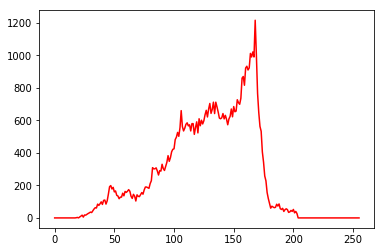

In [20]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('dataset/train/age_8_12/gad4.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.plot(histogram, color='red')
plt.savefig('histo.jpg')
plt.show()

In [19]:
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))

In [13]:
pip install ipympl 


The following command must be run outside of the IPython shell:

    $ pip install ipympl 

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/
